# 비즈니스 Case Study를 통한 추천 시스템 구현

## 1강 추천 시스템 Basic, 데이터 탐색과 비개인화 추천

### 1. 추천 시스템 기초

#### 추천화 시스템이란?

특정 유저에게 적합한 아이템을, 특정 아이템에 적합한 유저를 추천하는 시스템입니다.

#### 추천 시스템의 필요성

과거엔 유저가 접할 수 있는 상품, 콘텐츠가 제한적였습니다. 그래서 고객이 직접 찾는데에도 큰 문제가 없었고 전체적으로 콘텐츠 소비가 되었습니다.

하지만 웹/모바일 환경이 나타나면서 다양한 상품, 콘텐츠가 등장하게 되면서 소수의 유명한 아이템`Few Popular Items`만 소비량이 증가하고 그외 것은 소외되는 긴 꼬리 현상`Long Tail Phenomemno`이 일어나게 됩니다. 추천 시스템은 이런 문제를 해결하는데 도움이 됩니다.

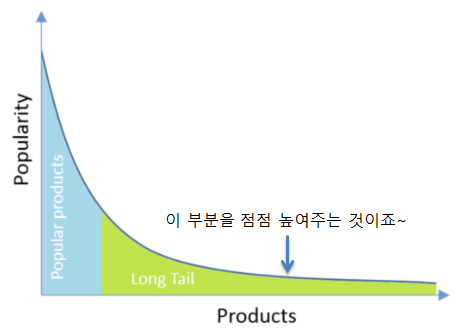

또한 콘텐츠가 많아지면서 정보를 찾는데 시간이 오래 걸리기도 합니다. 유저가 원하는 콘텐츠가 있지만, 어떤 키워드로 찾아야 하는지 모르는 경우가 있죠. 이러한 경우 추천 시스템을 통해 원하는 것을 명명할 수 없어도 찾아낼 수 있습니다.

#### Long-tail 추천 케이스

**1. 유튜브 동영상 추천**<br>
+ 동영상 조회수 급상승! -> 해당 영상과 관련 있거나, 해당 영상이 업로드된 채널의 영상을 추천<br>


**2. SNS 친구 추천**<br>
+ 수천만 혹은 수십억명의 유저들 가운데 내가 알만한 사람들 추천

#### 사용하는 정보

1. **유저 정보**
    1. **유저 프로파일링** : 추천 대상 유저에 관련된 정보를 구축, 개별 유저 또는 유저 그룹별로 추천
    2. **식별자(ID)** : 유저 ID, 디바이스 ID 브라우저 쿠키
    3. **데모그래픽** : 성별, 연령, 지역, 관심사
    4. **유저 행동 정보** : 페이지 방문 기록, 아이템 평가, 구매 등의 피드백 기록
2. **아이템 정보**
    1. **추천 아이템의 종류**
        1. **포탈** : 뉴스, 블로그, 웹툰 등 콘텐츠 추천
        2. **광고/커머스** : 광고 소재, 상품 추천
        3. **미디어** : 영화, 음악, 동영상 추천
    2. **아이템 프로파일링**
        1. **아이템 ID**
        2. **아이템의 고유 정보**
            + `영화` : 장르, 출연 배우 및 감독, 소개글, 개봉년도
            + `상품` : 상품 카테고리, 브랜드, 출시일, 상품 이미지
            + `음악` : 아티스트, 작곡가, 장르, 음악 신호 그 자체(!)
3. **유저 - 아이템 간 상호작용 정보**
    1. **유저와 아이템의 상호작용 데이터**
        + 유저가 오프라인/오프라인에서 아이템과 상호작용 시 로그로 기록
        + 추천 시스템 학습하는 데이터의 `Feedback`이 됨
    2. **Explicit Feedback**
        + 유저에게 아이템에 대한 만족도를 직접 물어봄<br>
            _**feat.** 1~5 사이 평점_
    3. **Implicit Feedback**
        + 유저가 아이템을 클릭하거나 구매한 경우<br>
            _**feat.** 쿠팡에서 유저 상품 구매 시 `Implicit Feedback` = 실제 결과`Y`_


#### 결국 추천 시스템이 하는 것은?

특정 유저에게 적합한 아이템을, 그리고 특정 아이템에게 적합한 유저를 추천합니다. 그리고 이를 위해서 유저-아이템에 대한 `Score` 값이 필요합니다. 

#### 추천 알고리즘 종류

1. Simple Aggregate (Popular, Average score, Recent Uploads)
    + 아이템 별로 인기도를 확인하는 방식으로 가장 간단
2. 연관성 분석(Association Analysis)
    + Transactions의 집단에서 특정 항목의 발생을 예상할 수 있는 Rule을 찾는 것_(잘 안쓰입니다)_
3. **콘텐츠 기반 추천(Content-based Recommendation)**<font color ='red'>(Usually!)</font>
    + 유저가 선호하는 아이템을 기반으로 해당 아이템과 유사한 아이템을 추천
    + 딥러닝`Deep Learning`이 나오면서 아이템이 가진 정보(이미지, etc)를 활용하기 용이해지면서 활용성이 증가
4. **협업 필터링(Collaborative-filtering)**<font color ='red'>(Usually!)</font>
    + 유저와 비슷한 성향을 갖는 유저들이 선호하는 아이템을 추천
    + 아이템 `Feature`를 사용하지 않음에도 높은 성능을 보임
5. <font color ='deepskyblue'>**Deep Learning Based Recommendation**</font>
    + 콘텐츠 기반 추천 + 협업 필터링



#### 추천 시스템 문제점

+ **Cold Start** 
    + 새로운 유저나 아이템 등장 시 학습을 위한 데이터 부족
    + 협업 필터링 모델 구축 어려움
+ **Scalability**
    + 유저와 아이템이 크게 증가하면 데이터의 크기가 기하급수로 커짐, 학습이나 추천을 위한 추론에 걸리는 시간과 계산량 多
    + **전반적인 머신러닝 시스템의 이슈**
+ **Data Sparsity**
    + 유저-아이템 사이의 Feedback이 있는 경우 < 없는 경우
    + **이는 유저, 아이템 개수가 많아질 수록 두드러짐**

#### 추천 시스템 서빙 예시

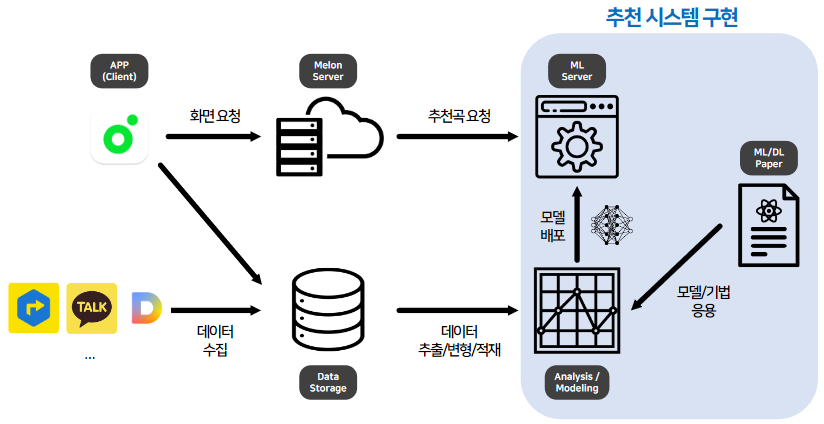

---

### 2. 인기도 기반 추천

말 그대로 가장 `인기`있는 아이템을 추천

#### Score 만드는 법

> **인기도의 척도**
>> 조회수, 평균 평점, 리뷰 개수, 좋아요 / 싫어요 수, etc<br>
>>  **ex.** 네이버 쇼핑 랭킹순, 다음 뉴스, 댓글 추천, Reddit Hot

1. 조회수가 가장 많은 아이템을 추천**`Most Popular`**
2. 평균 평점이 가장 높은 아이템을 추천 **`Highly Rated`**

하나만의 방식으로 만드는 것은 원하는 결과를 얻기 힘듭니다. 

뉴스를 예로 들면 조회수가 많은 기사가 있지만, 오래전에 게시된 글이라 조회수가 누적되어 많은 경우가 있습니다. 뉴스는 `최신성`이라는 속성이 매우 중요하기 때문에 이를 고려해야 합니다.

#### Score 방식

**Fomula Overview**

$Score = (좋아요 - 싫어요) - 경과 시간$
$= (페이지 뷰) - 경과 시간$

+ 이경우 페이지 뷰가 더 빠르게 늘어나면, **1~2년이 지나도 계속해서 같은 글이 Top Rank에 보이게 될 것입니다.**

**Hacker News Formula**

$Score = \frac{페이지 뷰 - 1}{(age + 2)^{gravity}}$


+ 뉴스에 대한 랭킹 Score, 시간 단위가 초`sec` 또는 분`Min` 단위
+ 시간이 지날수록 `age`가 점점 증가하면서 `Score`가 작아집니다
+ 시간에 따라 줄어드는 `Score`를 조정하기 위해 `gravity`라는 상수를 사용합니다

**Reddit Formula**

$Score = log_{10}(좋아요 - 싫어요) + \frac{ sin(좋아요 - 싫어요) sec}{45000}$

+ 첫번째 term은 `Popularity`, 두번째 Term은 `글이 포스팅이 게시된 절대 시간`으로 **나중에 게시된 포스팅일 수록 더 높은 `Score`를 가지게 됩니다.**
+ 첫번째 `vote`에 대해서 가장 높은 가치를 부여하며, **`vote`가 늘어날 수록 `Score`의 증가 폭이 작아집니다.**

**Highly Rated**

$평균 평점 = \frac{긍정적인 리뷰 수}{전체 리뷰}$ 

$평점 = 평균 평점 - (평균 평점 - 0.5(중간 수) * 2^{-log_{10}{전체 리뷰}})$ 

+ 가장 높은 평점을 통한 Score
+ `rating`은 평균값을 사용하되, 전체 review 개수에 따라 rating을 보정

**Steam Rating Formula**

$평균 평점 = \frac{모든 평점의 합}{전체 리뷰}$ 

$평점 = 평균 평점 - (평균 평점 - 3.0 * 2^{-log_{10}{전체 리뷰}})$ 

+ Steam의 경우 1.0 ~ 5.0까지 Rating

---

### 3. 연관분석(Association Analysis) 알고리즘

`장바구니 분석` 또는 `서열 분석`이라고도 불립니다.

데이터베이스 내에서 상품의 구매, 조회 등 연속된 거래들 사이의 규칙을 발견하기 위해 사용합니다.
> Example<br>
1. `맥주`와 `기저귀`를 같이 구매하는 빈도는?
2. `컴퓨터`를 산 고객이 다음에 가장 많이 사는 상품은?

#### 연관 규칙 분석(Association Rule Mining)

주어진 거래`Transaction` 데이터에 대해서 하나의 상품 등장 시 다른 상품이 같이 등장하는 규칙을 찾는 것입니다.

| Transcation | Items |
| :------: |  :------: |
| 1 | {빵, 우유} |
| 2 | {빵, 기저귀, 맥주, 계란} |
| 3 | {우유, 기저귀, 맥주, 콜라} |
| 4 | {빵, 우유, 기저귀, 맥주} |
| 5 | {빵, 우유, 기저귀, 콜라} |

Example)<br>
1. {기저귀} -> {맥주}
2. {우유, 빵} -> {계란, 콜라}
3. {맥주, 빵} -> {우유}<br>
<font  color ='deepskyblue'>여기서 화살표는 `인과 관계`가 아닌  `연관 규칙`입니다. '반드시'가 아닌 그럴 확률에 높다고 보면 됩니다.</font>


`규칙` : IF condition THEN result, {A} -> {B} 형식으로 표현<br>
`연관 규칙` : 특정 사건 발생 시 함께 빈번하게`frequently` 발생하는 또 다른 사건의 규칙을 의미

IF part = `antecedent`, THEN  part = `consequent`

itemset = `antecedent`와 `consequent`를 이루는 상품의 `set`<br>
(`antecedent`와 `consequent`는 서로소`disjoint`를 만족)<br>
> Example)<br>
`antecedent` : {빵, 버터}, `consequent` : {우유} => `confident factor` = 90%


#### 빈발 집합(Frequent Itemset)

##### Itemset
- 1개 이상의 item의 집합`set`
- `k-itemset` : k개의 item으로 이뤄진 `itemset`

##### Support count($\sigma$)
- 전체 `transaction` data에서 itemset이 등장하는 횟수<br>
ex. $\sigma(\text{{빵, 우유}})=3$

##### Support
- `itemset`이 전체 `transaction data`에 등장하는 비율<br>
ex. $\text{support({빵, 우유})} = \frac{3}{5} = 0.6$

##### Frequent itemset
- 유저가 지정한 최소 `support` 값 이상의 `itemset`
- `Infrequent itemset`은 반대로 유저가 지정한 최소 `support`보다 작은 `itemset`

#### 연관규칙의 척도: support, confidence, lift

`Frequent itemset`들 사이의 `연관 규칙`을 만들기 위해선 `measurement`가 필요합니다

**Association rule** : X $\rightarrow$ Y가 존재할 때, (X, Y : itemset, N : 전체 `transaction` 수)

##### Support
- 두 `itemset` X, Y를 모두 포함하는 `transaction`의 비율
- 전체 `transaction`에 대한 `itemset`의 **확률값**
- `support`는 '빈도가 높거나, 구성 비율이 높은' 좋은 규칙을 찾거나, 불필요한 연산을 줄일 때 사용됩니다.

$s(X) = \frac{n(X)}{N} = P(X)\\
s(X \rightarrow Y) = \frac{n(X \cup Y)}{N}=P(X \cap Y)$

##### Confidence
- X를 포함하는 `transaction` 가운데 Y도 포함하는 `transaction` 비율(조건부 확률)
- `confidence`가 높을 수록 유용!

$c(X \to Y) = \frac{n( X \cup Y)}{n(X)} = \frac{s(X \to Y)}{s(X)} = \frac{P(X \cap Y)}{P(X)} = P(Y \vert X) $

##### lift
- $\frac{\text{[X가 포함된 `transaction` 가운데 Y가 등장될 확률]}}{\text{[Y가 등장할 확률]}}$
- `lift`가 1 $\to$ X, Y는 **독립**
- `lift`가 1 보다 큶 $\to$ 두 상품의 양의 상관관계를 가짐, 1 보다 작음 $\to $음의 상관관계를 가짐

$l(X \to Y) = \frac{P(X \cap Y)}{P(X)P(Y)} = \frac{x(X \to Y)}{s(X)s(Y)} = \frac{c(X \to Y)}{s(Y)}$

##### Note
해당 알고리즘에선 일반적으로 `confidence` 그리고 `lift`를 자주 사용합니다.

##### 예시

| Transcation | Items |
| :------: |  :------: |
| 1 | {맥주, 우유} |
| 2 | {빵, 기저귀, 맥주, 계란} |
| 3 | {우유, 기저귀, 맥주, 콜라} |
| 4 | {빵, 우유, 기저귀, 맥주} |
| 5 | {빵, 우유, 기저귀, 콜라, 계란} |

**{빵(X)} $\to$ {계란(Y)}**

**support**<br>
$s(X \rightarrow Y) = \frac{n(X \cup Y)}{N}=P(X \cap Y)\\
= \frac{n(2, 5)}{5} = 0.4$

**confidence**<br>
$c(X \to Y) = \frac{n( X \cup Y)}{n(X)} = \frac{n(2,5)}{n(2,4,5)} = 0.66\\
= P(Y \vert X) = \frac{P(X \cap Y)}{P(X)} = \frac{0.4}{0.6} = 0.66$

**lift**<br>
$l(X \to Y) = \frac{c(X \to Y)}{s(Y)} = \frac{0.66}{0.4} = 1.66 \
= \frac{x(X \to Y)}{s(X)s(Y)} = \frac{0.4}{0.6 \cdot 0.4} = 1.66$


##### support, confidence, lift 사용법

- 가능한 `itemset`에 대해서 `rule`은 기하급수적으로 많아집니다. $\to$ **유의미한 `rule`만 사용해야 함**

> 사용법<br>
1. 최소한의 `support`, 최소한의 `condfidence`로 의미 없는 `rule`을 screen out!<br>
$\to$전체 `transcation` 중에서 너무 적게 등장하거나, 조건부확률이 아주 낮은 `rule` 필터링
2. `lift` 값으로 내림차순 정렬을 하여 의미 있는 `rule`을 평가<br>
$\to$`lift`가 크다는 것은 `rule`을 구상하는 `antecedent`와 `consequent`가 연관성이 높고 유의미하다는 의미!




---

### 4. 추천 시스템의 평가 지표

새로 적용한 추천 시스템 혹은 추천 모델의 성능 평가는 어떻게 해야하는가?

#### 비즈니스 / 서비스 관점

- 추천 시스템 적용으로 인한 매출, PV의 증가
- 새로운 추천 아이템으로 인한 유저의 CTR 상승

#### 품질 관점

+ 연관성`Relevance` : 추천된 아이템이 유저에게 관련이 있는가?
+ 다양성`Diversity` : 추천된 Top-K 아이템에 얼마나 다양한 아이템에 추천되는가?
+ 새로움`Novelty` : 얼마나 새로운 아이템이 추천되고 있는가?
+ 참신함`Serendipity` : 유저가 기대하지 못한 뜻밖의 아이템이 추천되는가?

#### 평가 과정

##### Offline Test

- 새로운 추천 모델을 검증하기 위해 가장 먼저 필요한 단계
- 유저로부터 이미 수집한 데이터를 Train/Valid/Test로 나누어 모델의 성능을 객관적인 지표로 평가
- 보통 Offline Test에서 좋은 성능을 보여야 Online 서빙에 투입되지만, 실제 서비스 상황에선 다양한 양상을 보임(Serving Bias)

###### 성능 지표

Precsion@K, Recalll@K, MAP, `NDCG`, `Hit Rate`, RMSE, MAE $\to$ 논문이나 A/B Test에선 강조된 지표를 자주 사용

##### Online A/B Test

- `Offline Test`에서 검증된 가설이나 모델을 이용해 실제 추천 결과를 서빙하는 단계
- 추천 시스템 변경 전후의 성능을 비교하는건이 아닌, 동시에 **대조군**`A`과 **실험군**`B`의 성능을 평가함 $ \to $ 단, `대조군`과 `실험군`의 환경은 동일해야 함
- 실제 서비스를 통해 얻어지는 결과를 통해 최종 의사결정이 이뤄진다.
- 대부분 현업에서 의사결정을 위해 사용하는 최종 지표는 모델 성능(`RMSE`, `NDCG` 등)이 아닌 `매출`, `CTR` 등의 비즈니스 / 서비스 지표이다.
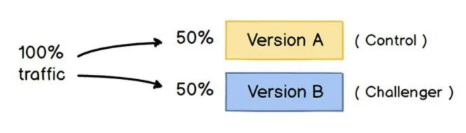

#### 성능 지표

##### Presion/Recall

- 이진 분류`Binary Classification`의 Metric으로 사용됨

$\text{Precision} = \frac{ \text{True Positive} }{\text{True Positive} + \text{False Positive}}$

$\to$ True라고 '예측'한 것들 가운데 실제 True인 비율

$\text{Recall} = \frac{ \text{True Positive} }{\text{True Positive} + \text{False Negative}}$

$\to$ 전체 True 가운데 True라고 '예측'한 비율

##### Precision/Recall@K

**Precision@K** : 우리가 추천한 K개 아이템 가운데 실제 유저가 관심있는 아이템의 비율


**Recall@K** : 유저가 관심있는 전체 아이템 가운데 우리가 추천한 아이템의 비율

Example)<br>
- 우리가 추천한 아이템 개수 : K = 5
- 추천한 아이템 중 유저가 관심있는 아이템 개수 : 2
- 유저가 관심있는 아이템의 전체 개수 : 3

**$\to$ Precision@5 = $\frac{2}{5}$, Recall@5 = $\frac{2}{3}$**


##### Mean Average Precsion(MAP)@K

**Average Precsion**<br>

$AP@K = \frac{1}{m}\sum_{i=1}^{K}Precision@i$

- Precision@1부터 Precision@K 까지의 평균값을 의미
- Precision@K와 다르게 연관성 있는`relevant`한 아이템을 더 높은 순위에 추천할 경우 점수가 상승합니다.


**MAP**<br>

$MAP@K = \frac{1}{\lvert U \rvert}\sum_{u=1}^{\lvert U \rvert}(AP@K)_{u}$

- 모든 유저에 대한 `Average Precision` 값의 평균 $\to$ 추천 시스템의 성능

##### Normailzed Discounted Cumulaitve Gain(NDCG)

- 추천 시스템에 가장 많이 사용되는 지표 중 하나, 원래는 검색`Information Retrieval`에서 등장한 지표
- `Precision@K`, `MAP@K`와 마찬가지로 Top K 추천 리스트를 만들고 유저가 선호하는 아이템을 비교하여 값을 구합니다.
- `MAP@K`처럼 `NDCG`는 추천의 순서에 가중치를 더 많이 두어 성능을 평가하며 **1에 가까울 수록 좋습니다.**
- `MAP`는 관련 여부를 binary(0/1)로 평가하지만, `NDCG`는 관련도 값을 사용할 수 있기 때문에, 유저에게 더 관련 있는 아이템을 상위로 노출시키는지 알 수 있습니다.

###### Cumulative Gain


$CG_{K} = \sum_{i=1}^{K} rel_{i}$
- 상위 p개 아이템에 대하여 관련도를 합한 것
- 순서에 따라 Discount하지 않고 동일하게 더한 값

###### Discounted Culative Gain
$DCG_{K}=\sum_{i=1}^{K}\frac{rel_{i}}{log_{2}(i+1)}$
- 순서에 따라 log 값으로 나눠 Cumulative Gain을 Discount

###### Ideal DCG

$IDCG = \sum_{i=1}^{K}\frac{rel_{i}^{opt}}{log_{2}(i+1)}$
- 이상적인 추천이 일어났을 때의 DCG 값
- 가능한 DCG 값 중에 제일 큶

###### Normalized DCG
$NDCG = \frac{DCG}{IDCG}$
- 추천 결과에 따라 구해진 `DCG`를 `IDCG`로 나눈 값 $\to$ **최대 값은 1이다.**

###### 예시
**NDCG@5**
- Ideal Order: [C(3), A(3), B(2), E(2), D(1)]
    - Relevance의 내림차순으로 정렬하여 추천하는 것이 이상적입니다.
- Recommend Order: [E, A, C, D, B]<br><br>
$DCG@5 = \frac{2}{log_{2}(1+1)} + \frac{3}{log_{2}(2+1)} + \frac{3}{log_{2}(3+1)} + \frac{1}{log_{2}(4+1)} + \frac{2}{log_{2}(5+1)} = 6.64$<br><br>
$IDCG@5 = \frac{3}{log_{2}(1+1)} + \frac{3}{log_{2}(2+1)} + \frac{2}{log_{2}(3+1)} + \frac{2}{log_{2}(4+1)} + \frac{1}{log_{2}(5+1)} = 7.14$<br><br>
$NDCG@5 = \frac{DCG}{IDCG} = \frac{6.64}{7.14} = 0.93$

#### Hit Rate @K

$\text{ Hit Rate } = \frac{\text{ # of hit user} }{ \text{# of user} }$
1. 특정 유저의 선호하거나 클릭했던 모든 Item을 가져옵니다.
2. 모든 `Item` 가운데 하나만 의도적으로 제거한다. $\to$ Leave-One-Out Cross-Validation
3. 남은 `Item`들을 가지고 추천 모델을 학습한 뒤, Top K 추천 리스트를 추출
4. K개의 추천 리스트 가운데 아까 제거한 `Item`이 있다면 hit, 아니면 hit가 아니다.

#### 평점 예측 방법(Cost Function)

1. 유저가 아이템에 대해 Explicit / Implicit한 Feedback을 남긴다.
2. Training Data를 통해 학습한 모델을 바탕으로 Test Data에 있는 Feedback 값을 얼마나 정확하게 예측하는지를 지표로 삼는다.
3. 실측값과 예측값의 차이를 하나의 성능 지표로 표현
    - MAE(Mean Absolute Error)
    - RMSE(Root Mean Square Error)
4. Error가 낮을 수록 추천 알고리즘의 성능이 좋다고 평가
    - 그러나 성능이 좋다고 해서 꼭 좋은 추천을 하는 것은 아니다.

##### MAE & RMSE


**Mean Absolute Error**

$MAE = \frac{1}{\lvert \hat{R} \rvert} \sum_{\hat{r}_{ui} \in \hat{R}} \lvert r_{ui} - \hat{r}_{ui} \rvert$


**Root Mean Square Error**

$RMSE =\sqrt{\frac{1}{\lvert \hat{R} \rvert} \sum_{\hat{r}_{ui} \in \hat{R}} (r_{ui} - \hat{r}_{ui})^{2}}$

- `RMSE`가 `MAE`보다는 outlier나 bad prediction에 취약합니다.
- `RMSE`는 절대값이 없기 때문에 수학적으로 간편 $\to$ 대부분의 Machine learning 모델은 `RMSE`를 손실함수`cost function`로 사용

###### 예시

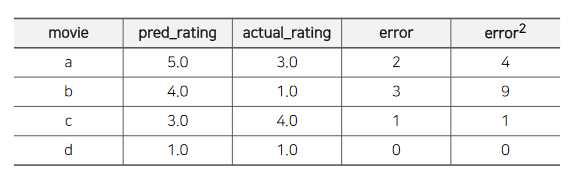

$MAE = \frac{(2 + 3 + 1 + 0)}{4} = 1.5$

$RMSE = \sqrt{\frac{4 + 9 + 1 + 0}{4}} = 1.87$

※ `RMSE`는 `MAE`보다 항상 큽니다.